# Uber's Drive Anaylysis

Set up libraries

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [55]:
%matplotlib inline

Open csv file

In [56]:
df = pd.read_csv('uber_src.csv')
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


Get data types

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


## 1. Cleansing the data

Remove duplicates

In [58]:
df[df.duplicated()]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
492,6/28/2016 23:34,6/28/2016 23:59,Business,Durham,Cary,9.9,Meeting


In [59]:
df.drop_duplicates(inplace=True)

Change column names

In [60]:
df.columns = ["START_DATE", "END_DATE", "CATEGORY", "START", "STOP", "MILES", "PURPOSE"]

Convert START_DATE and END_DATE to datetime

In [61]:
df['START_DATE'] = pd.to_datetime(df['START_DATE'], errors='coerce')
df['END'] = pd.to_datetime(df['END_DATE'], errors='coerce')

## 2. EDA the data

#### The column chart of number of items in "CATEGORY"

<AxesSubplot:xlabel='CATEGORY', ylabel='count'>

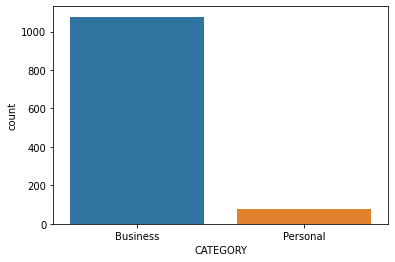

In [62]:
sns.countplot(data=df, x='CATEGORY')

**Most calls are for business with approximately 900 cases**

#### Bar charts for starting destinations

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Cary'),
  Text(1, 0, 'Unknown Location'),
  Text(2, 0, 'Morrisville'),
  Text(3, 0, 'Whitebridge'),
  Text(4, 0, 'Islamabad'),
  Text(5, 0, 'Lahore'),
  Text(6, 0, 'Durham'),
  Text(7, 0, 'Raleigh'),
  Text(8, 0, 'Kar?chi'),
  Text(9, 0, 'Westpark Place')])

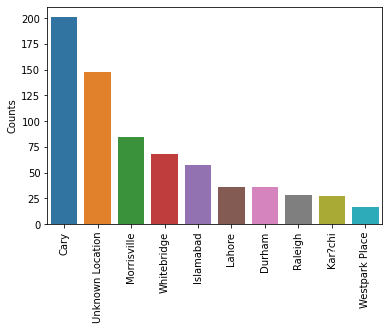

In [63]:
start_des = df.START.value_counts().nlargest(10)
sns.barplot(x=start_des.index, y=start_des)
plt.ylabel('Counts')
plt.xticks(rotation=90)

- **Cary holds dominant position for having the highest counts with 200 calls.**
- **Whereas unknown locations stands for the second highest with 150 calls.**

#### Bar chart for stopping destinations

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Cary'),
  Text(1, 0, 'Unknown Location'),
  Text(2, 0, 'Morrisville'),
  Text(3, 0, 'Whitebridge'),
  Text(4, 0, 'Islamabad'),
  Text(5, 0, 'Durham'),
  Text(6, 0, 'Lahore'),
  Text(7, 0, 'Raleigh'),
  Text(8, 0, 'Kar?chi'),
  Text(9, 0, 'Apex')])

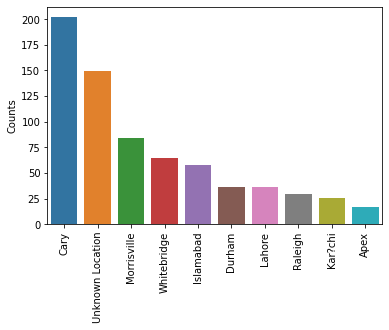

In [64]:
stop_des = df.STOP.value_counts().nlargest(10)
sns.barplot(x=stop_des.index, y=stop_des)
plt.ylabel('Counts')
plt.xticks(rotation=90)

- **The top 4 remains the exam**
- **Durtham slightly surpass Lahbre**
- **Westparkplace is replaced by Apex**

# 3.Refine the data

Add column "Month"

In [65]:
df['MONTH'] = pd.DatetimeIndex(df['START_DATE']).month

Maps months' labels

In [66]:
month_labels = {
    1.0: "Jar", 2.0: "Feb", 3.0: "Mar", 4.0: "April", 5.0: "May", 6.0: "June",
    7.0: "Jul", 8.0: "Aug", 9.0: "Sep", 10.0: "Oct", 11.0: "Nov", 12.0: "Dec"
}
df['MONTH'] = df.MONTH.map(month_labels)
df.MONTH.unique()

array(['Jar', 'Feb', 'Mar', 'April', 'May', 'June', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec', nan], dtype=object)

#### Bar chart showing number of calls in each months

Text(0.5, 0, 'Month')

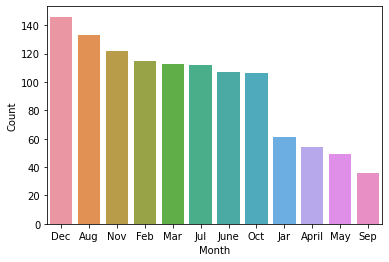

In [67]:
month_count = df.MONTH.value_counts()
sns.barplot(x=month_count.index, y=month_count)
plt.ylabel('Count')
plt.xlabel('Month')

- **Most of the calls occur in December, August and Novmber**
- **Febuary, March, July, June and October share approximately the same number at 110**
- **On the contrary, September has the least the number at 40**

Maps miles' labels

In [68]:
mile_dict = {}
for i in df.MILES:
    if i < 10:
        if '0-10 miles' not in mile_dict:
            mile_dict['0-10 miles'] = [i]
        else:
            mile_dict['0-10 miles'].append(i)
    
    elif i > 10 and i < 20:
        if '10-20 miles' not in mile_dict:
            mile_dict['10-20 miles'] = [i]
        else:
            mile_dict['10-20 miles'].append(i)

    elif i > 20 and i < 30:
        if '20-30 miles' not in mile_dict:
            mile_dict['20-30 miles'] = [i]
        else:
            mile_dict['20-30 miles'].append(i)  
    
    elif i > 40 and i < 50:
        if '40-50 miles' not in mile_dict:
            mile_dict['40-50 miles'] = [i]
        else:
            mile_dict['40-50 miles'].append(i)
    else:
        if 'above 50 miles' not in mile_dict:
            mile_dict['above 50 miles'] = [i]
        else:
            mile_dict['above 50 miles'].append(i)

SyntaxError: expected ':' (2556537895.py, line 2)